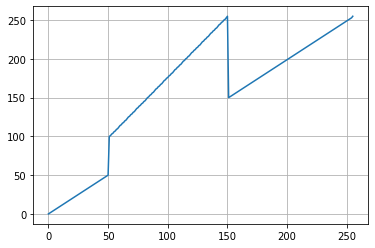

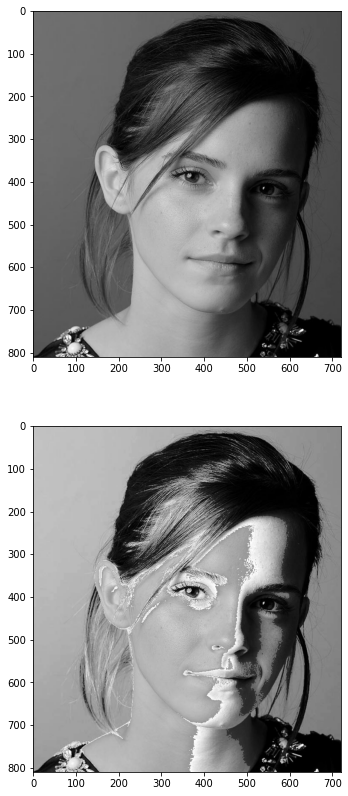

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r"D:\PasinduManodara\Documents\OneDrive - University of Moratuwa\Academic Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\Assignments\Assignment1\emma_gray.jpg",cv.IMREAD_COLOR)
assert img is not None

t1=np.linspace(0,50,51, endpoint=True)
t2 = np.linspace(50,100,0,endpoint=True)
t3 = np.linspace(100,255,100, endpoint=True)
t4 = np.linspace(255,150,0,endpoint=True)
t5 = np.linspace(150,255,105, endpoint=True)

t = np.concatenate((t1,t2,t3,t4,t5), axis=0).astype(np.uint8)
g= cv.LUT(img,t)
fig, ax = plt.subplots()
ax.grid()
ax.plot(t)
plt.show()

plt.figure(figsize=(16,14))

plt.subplot(2,1,1)
plt.imshow(img)
plt.subplot(2,1,2)
plt.imshow(g)




[ 25  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25
  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25
  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25
  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25
  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25
  25  25  25  25  25  25  25  25  25  25 250 250 250 250 250 250 250 250
 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250
 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250
 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250
 250 250 250 250 250 250 250 250 250 250 250 250 250  25  25  25  25  25
  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25
  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25
  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25
  25  25  25  25  25  25  25  25  25  25  25  25  2

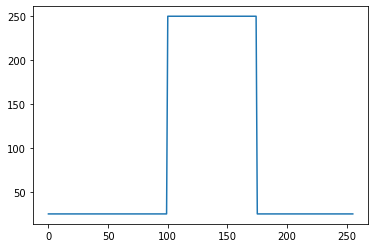

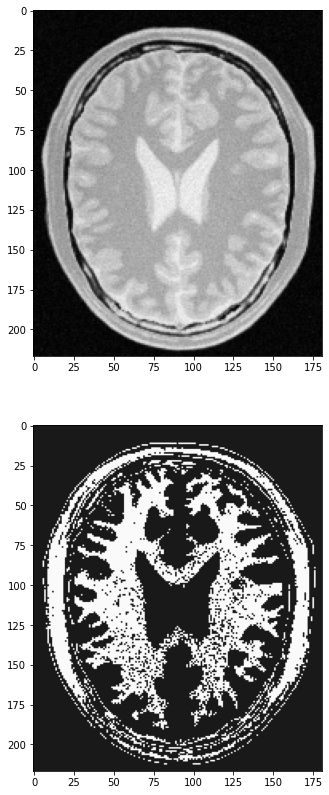

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r"D:\PasinduManodara\Documents\OneDrive - University of Moratuwa\Academic Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\Assignments\Assignment1\brain_proton_density_slice.png",cv.IMREAD_COLOR)
assert img is not None
t1 = np.linspace(0,25,0, endpoint=True)
t2=np.linspace(25,25,100, endpoint=True)
t3 = np.linspace(25,250,0,endpoint=True)
t4 = np.linspace(250,250,75, endpoint=True)
t5 = np.linspace(250,25,0,endpoint=True)
t6 = np.linspace(25,25,81, endpoint=True)
t7 = np.linspace(25,0,0, endpoint=True)

t = np.concatenate((t1,t2,t3,t4,t5,t6,t7), axis=0).astype(np.uint8)
print(t)
fig, ax = plt.subplots()
ax.plot(t)
plt.show()
g= cv.LUT(img,t)
plt.figure(figsize=(16,14))
plt.subplot(2,1,1)
plt.imshow(img)
plt.subplot(2,1,2)
plt.imshow(g)


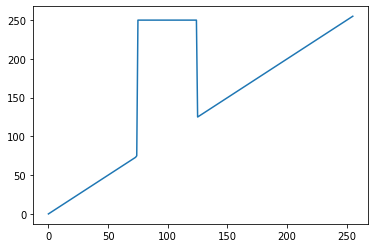

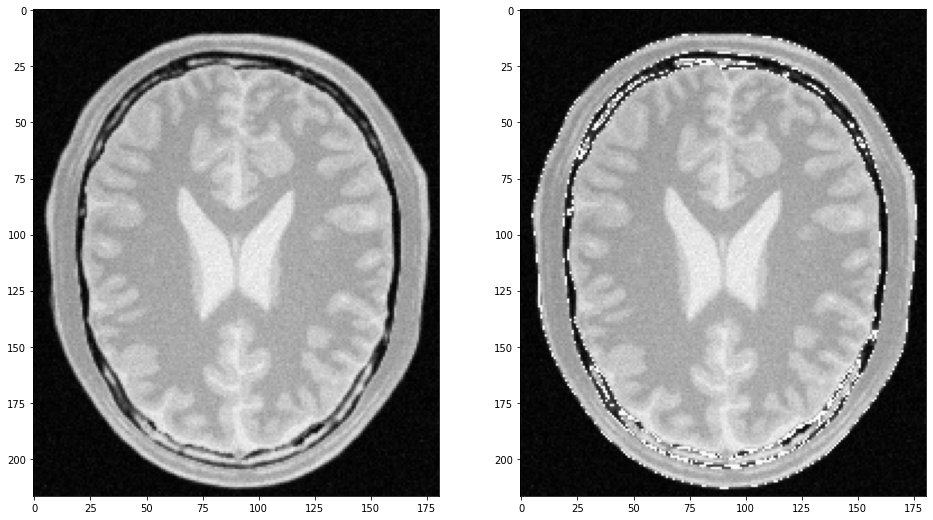

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r"D:\PasinduManodara\Documents\OneDrive - University of Moratuwa\Academic Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\Assignments\Assignment1\brain_proton_density_slice.png",cv.IMREAD_COLOR)
assert img is not None
t1 = np.linspace(0,75,75, endpoint=True)
t2=np.linspace(75,250,0, endpoint=True)
t3 = np.linspace(250,250,50,endpoint=True)
t4 = np.linspace(250,125,0, endpoint=True)
t5 = np.linspace(125,255,131,endpoint=True)
#t6 = np.linspace(25,25,81, endpoint=True)
#t7 = np.linspace(25,0,0, endpoint=True)

t = np.concatenate((t1,t2,t3,t4,t5), axis=0).astype(np.uint8)
#print(t)
fig, ax = plt.subplots()
ax.plot(t)
plt.show()
g= cv.LUT(img,t)
plt.figure(figsize=(16,14))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(g)

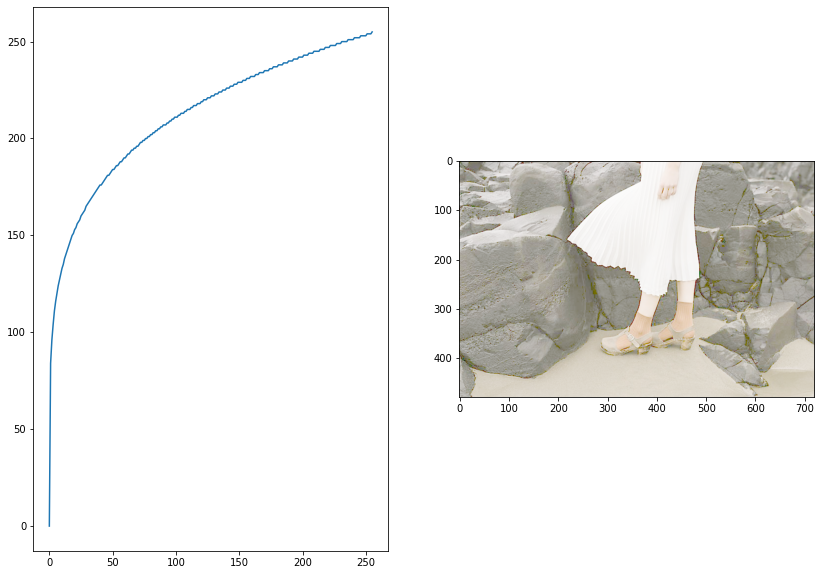

In [15]:
##### Question 3
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread(r"D:\PasinduManodara\Documents\OneDrive - University of Moratuwa\Academic Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\Assignments\Assignment1\Images\highlights_and_shadows.jpg",cv.IMREAD_COLOR)
gamma = 0.2

transform = np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8)
g = cv.LUT(img, transform)


fix, ax =plt.subplots(1,2, figsize=(14,10))
ax[0].plot(transform)
ax[1].imshow(cv.cvtColor(g, cv.COLOR_BGR2RGB,2))
plt.show()

